In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Obesity prediction.csv")
df.head()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


,count
Obesity,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


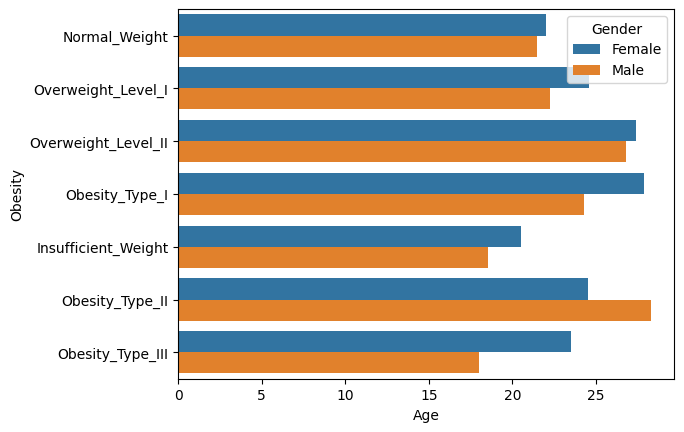

In [ ]:
sns.barplot(data=df,x='Age',y='Obesity',hue='Gender',errorbar=None)
df['Obesity'].value_counts()

([<matplotlib.patches.Wedge at 0x7a283e162850>,
 [Text(-1.0830508078005185, 0.19235630408864798, 'Obesity_Type_I'),
  Text(-0.743367104651757, -0.8108053698155088, 'Obesity_Type_III'),
  Text(0.1992472868886763, -1.0818042885233454, 'Obesity_Type_II'),
  Text(0.9572770421370568, -0.5418677556353837, 'Overweight_Level_I'),
  Text(1.0340346359407713, 0.37519644411272973, 'Overweight_Level_II'),
  Text(0.39164786039987887, 1.0279163163624738, 'Normal_Weight'),
  Text(-0.4960886988319173, 0.9817820546797825, 'Insufficient_Weight')],
 [Text(-0.59075498607301, 0.10492162041198981, '16.6%'),
  Text(-0.4054729661736856, -0.44225747444482294, '15.3%'),
  Text(0.10868033830291433, -0.5900750664672793, '14.1%'),
  Text(0.52215111389294, -0.2955642303465729, '13.7%'),
  Text(0.5640188923313297, 0.20465260587967074, '13.7%'),
  Text(0.2136261056726612, 0.5606816271068038, '13.6%'),
  Text(-0.2705938357265003, 0.5355174843707904, '12.9%')])

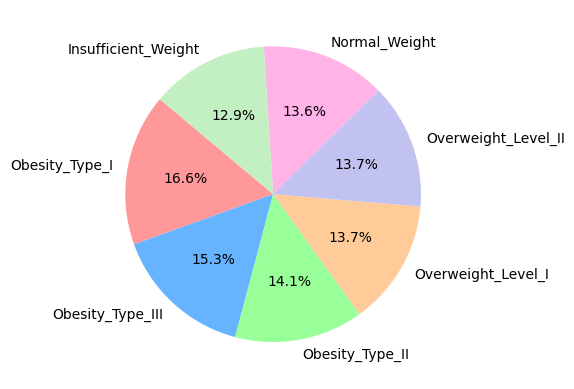

In [ ]:
Obesity_count = df['Obesity'].value_counts()
plt.pie(Obesity_count,
        labels=Obesity_count.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2']
       )

<Axes: xlabel='Age', ylabel='MTRANS'>

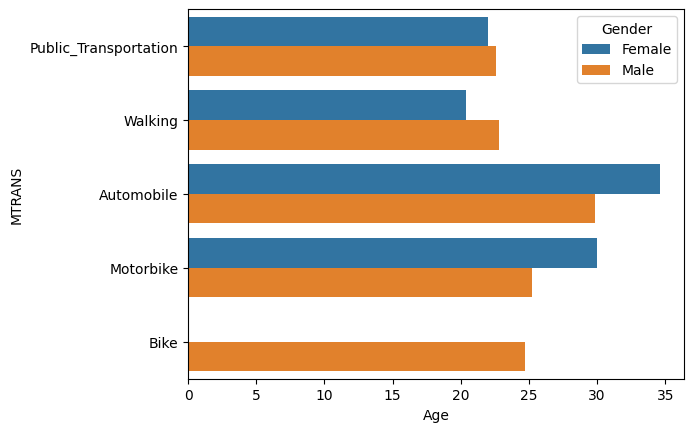

In [ ]:
sns.barplot(data=df,x='Age',y='MTRANS',hue='Gender',errorbar=None)

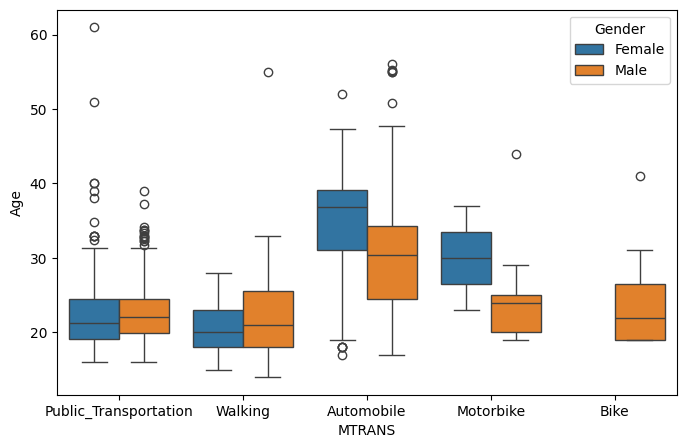

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='MTRANS',y='Age',hue='Gender')
transport_count = df['MTRANS'].value_counts()

([<matplotlib.patches.Wedge at 0x7a283b7a2990>,
 [Text(0.09057023331244529, -1.0962650376791778, 'Public_Transportation'),
  Text(0.03046269066177779, 1.0995781120400883, 'Automobile'),
  Text(-0.7382579317903978, 0.8154601315506262, 'Walking'),
  Text(-0.8157655407677759, 0.7379204445574457, 'Motorbike'),
  Text(-0.8352376402993161, 0.7158058984300356, 'Bike')],
 [Text(0.04940194544315197, -0.597962747825006, '74.8%'),
  Text(0.01661601308824243, 0.5997698792945936, '21.6%'),
  Text(-0.4026861446129442, 0.44479643539125063, '2.7%'),
  Text(-0.44496302223696865, 0.40250206066769756, '0.5%'),
  Text(-0.4555841674359905, 0.39043958096183756, '0.3%')])

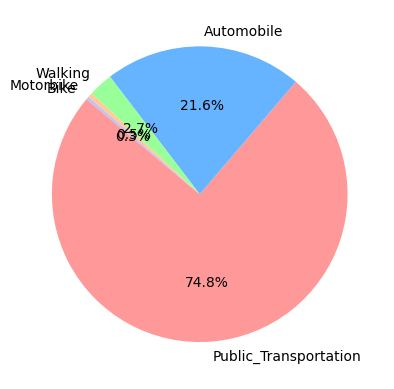

In [ ]:
# plt.figure(figsize=(15,9))
plt.pie(transport_count,
        labels=transport_count.index,
        autopct='%1.1f%%',
        startangle=140,
        # rotatelabels=45,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2']
       )

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

<Axes: >

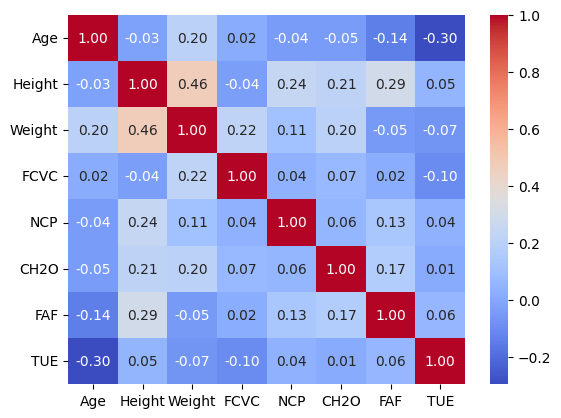

In [ ]:
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            fmt='.2f'
           )

In [ ]:
df['BMI'] = df['Weight'] / df['Height']
# df.head()

In [ ]:
x = df[['Age','FAF','BMI']]
y = df['Obesity']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("\nClassification_report:\n",classification_report(y_test,y_pred))

Accuracy:  90.30732860520094

Classification_report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.96      0.95        56
      Normal_Weight       0.87      0.87      0.87        62
     Obesity_Type_I       0.90      0.95      0.93        78
    Obesity_Type_II       0.95      0.97      0.96        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.82      0.80      0.81        56
Overweight_Level_II       0.84      0.72      0.77        50

           accuracy                           0.90       423
          macro avg       0.90      0.90      0.90       423
       weighted avg       0.90      0.90      0.90       423



In [ ]:
data = pd.DataFrame({'Age':[21] ,'FAF':[0.000000] ,'BMI':[39.506173]})
data_pred = model.predict(data)
print("The Obesity types is ",data_pred[0])

The Obesity types is  Normal_Weight


In [ ]:
df['CALC'].value_counts()


,count
CALC,
Sometimes,1401
no,639
Frequently,70
Always,1
